In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz
!tar -xvf spark-3.0.3-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop2.7"
import findspark
findspark.init()

spark-3.0.3-bin-hadoop2.7/
spark-3.0.3-bin-hadoop2.7/NOTICE
spark-3.0.3-bin-hadoop2.7/kubernetes/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/Dockerfile
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/Dockerfile
spark-3.0.3-bin-hadoop2.7/jars/
spark-3.0.3-bin-hadoop2.7/jars/jacks

In [ ]:
#Spark Sql + Visualisasi

#Bar, plot, pie, scatter

from pyspark.sql import SparkSession

session = SparkSession.builder.getOrCreate()

In [ ]:
#dibaca sebagai spark dataframe, bukan temp table

MsBrand = session.read.csv("MsBrand.csv", header=True, inferSchema=True)
MsCountry = session.read.csv("MsCountry.csv", header=True, inferSchema=True)
MsCustomer = session.read.csv("MsCustomer.csv", header=True, inferSchema=True)
MsRamen = session.read.csv("MsRamen.csv", header=True, inferSchema=True)
MsRamenStyle = session.read.csv("MsRamenStyle.csv", header=True, inferSchema=True)
TransactionDetail = session.read.csv("TransactionDetail.csv", header=True, inferSchema=True)
TransactionHeader = session.read.csv("TransactionHeader.csv", header=True, inferSchema=True)

In [ ]:
#temporary table
MsBrand.registerTempTable("MsBrand")
MsCountry.registerTempTable("MsCountry")
MsCustomer.registerTempTable("MsCustomer")
MsRamen.registerTempTable("MsRamen")
MsRamenStyle.registerTempTable("MsRamenStyle")
TransactionDetail.registerTempTable("TransactionDetail")
TransactionHeader.registerTempTable("TransactionHeader")

In [ ]:
res1 = session.sql("SELECT * from TransactionHeader")
res1.show()

+-------------+---------------+----------+
|TransactionId|TransactionDate|CustomerId|
+-------------+---------------+----------+
|            1|     2019-03-20|      2843|
|            2|     2019-12-25|       282|
|            3|     2019-11-16|      1514|
|            4|     2019-07-31|      1026|
|            5|     2019-03-12|      2419|
|            6|     2019-12-03|       829|
|            7|     2019-07-28|      2438|
|            8|     2019-09-30|      1828|
|            9|     2019-12-02|      2500|
|           10|     2019-02-05|      1488|
|           11|     2019-03-12|      1485|
|           12|     2019-09-20|      2875|
|           13|     2019-01-16|      1215|
|           14|     2019-05-26|      1365|
|           15|     2019-11-16|       976|
|           16|     2019-10-18|      1621|
|           17|     2019-05-09|       405|
|           18|     2019-08-29|      1120|
|           19|     2019-05-20|      1708|
|           20|     2019-05-07|        59|
+----------

In [ ]:
res1 = session.sql("""
    SELECT
    mr.RamenName,
    SUM(Quantity) AS `Total Sold`
    FROM TransactionDetail td JOIN MsRamen mr ON td.RamenId = mr.RamenId
    GROUP BY mr.RamenName
    HAVING SUM(Quantity) > 250
""")

#NB : tulisan Total Sold pakai backtick (``) biar didetect sebagai integer,
#bukan tanda petik ('')

In [ ]:
res1.show()

+--------------------+----------+
|           RamenName|Total Sold|
+--------------------+----------+
|           Vegetable|       316|
|  Artificial Chicken|       308|
|                Beef|       413|
|             Chicken|       333|
|            Yakisoba|       362|
|Artificial Beef F...|       264|
+--------------------+----------+



In [ ]:
#harus diubah dulu ke pandas biar bisa dibaca matplotlib
res1 = res1.toPandas()

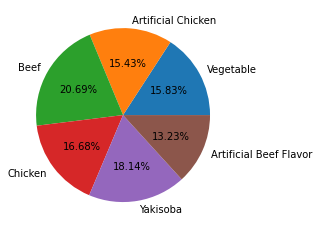

In [ ]:
#pie

import matplotlib.pyplot as plt

plt.pie(res1["Total Sold"], labels=res1["RamenName"], autopct="%.2f%%")
plt.show()

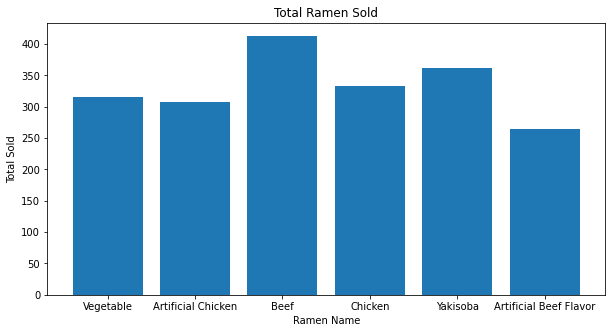

In [ ]:
#bar
plt.figure(figsize=(10, 5))
plt.bar(res1["RamenName"], res1["Total Sold"])
plt.title("Total Ramen Sold")
plt.xlabel("Ramen Name")
plt.ylabel("Total Sold")
plt.show()

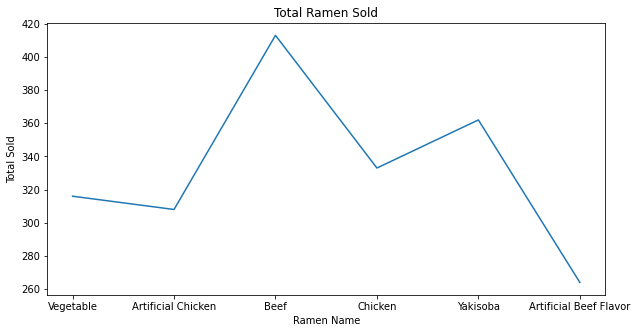

In [ ]:
#plot

plt.figure(figsize=(10, 5))
plt.plot(res1["RamenName"], res1["Total Sold"])
plt.title("Total Ramen Sold")
plt.xlabel("Ramen Name")
plt.ylabel("Total Sold")
plt.show()

#Coba Contoh Soal

a.	Show top 5 country which distributed the most number of ramen using pie plot. Don’t forget to add title, labels, and percentage for the plot.

In [ ]:
top5 = session.sql("""
    SELECT
    mc.CountryName,
    COUNT(mr.CountryId) AS `Country`
    FROM MsRamen mr JOIN MsCountry mc ON mr.CountryId = mc.CountryId
    GROUP BY mc.CountryName
    ORDER BY Country desc
    LIMIT 5
""")

In [ ]:
top5.show()

+-----------+-------+
|CountryName|Country|
+-----------+-------+
|      Japan|    352|
|        USA|    323|
|South Korea|    309|
|     Taiwan|    224|
|   Thailand|    191|
+-----------+-------+



In [ ]:
top5 = top5.toPandas()

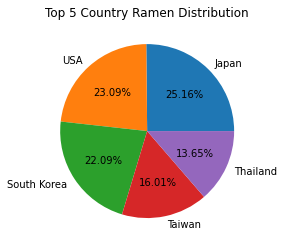

In [ ]:
plt.pie(top5["Country"], labels=top5["CountryName"], autopct="%.2f%%")
plt.title("Top 5 Country Ramen Distribution")
plt.show()

b.	Show the amount of revenue for each month within year 2019 using line plot. Don’t forget to add title, x-label, and y-label for the plot.

In [ ]:
revenue = session.sql("""
  SELECT
  MONTH(th.TransactionDate) as `Month`,
  SUM(td.Quantity) AS `quantity`,
  SUM(mr.RamenPrice * quantity) AS `totalPrice`
  FROM TransactionHeader th JOIN TransactionDetail td ON th.TransactionId = td.TransactionId
  JOIN MsRamen mr ON td.RamenId = mr.RamenId
  GROUP BY MONTH(th.TransactionDate)
  ORDER BY MONTH(th.TransactionDate) asc
""")

In [ ]:
revenue.show()

+-----+--------+----------+
|Month|quantity|totalPrice|
+-----+--------+----------+
|    1|   11771| 316534000|
|    2|   10946| 292087000|
|    3|   12021| 328064000|
|    4|   11028| 302013000|
|    5|   11244| 305102000|
|    6|   11431| 310177000|
|    7|   11507| 312101000|
|    8|   11920| 328337000|
|    9|   11238| 307199000|
|   10|   11858| 317046000|
|   11|   11761| 317946000|
|   12|   10671| 295857000|
+-----+--------+----------+



In [ ]:
revenue = revenue.toPandas()

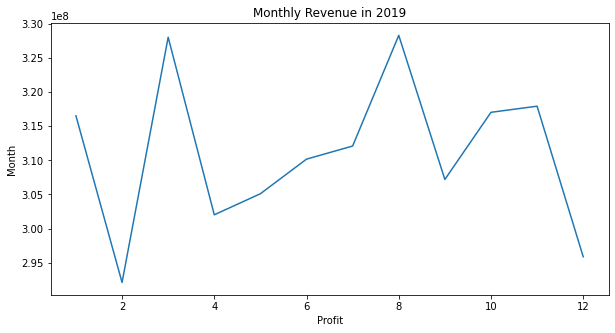

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(revenue["Month"], revenue["totalPrice"])
plt.title("Monthly Revenue in 2019")
plt.xlabel("Profit")
plt.ylabel("Month")
plt.show()

In [ ]:
ramenStyle = session.sql("""
  SELECT
  mrs.RamenStyleName,
  COUNT(mr.RamenStyleId) AS `Ramen Style`
  FROM MsRamen mr JOIN MsRamenStyle mrs ON mr.RamenStyleId = mrs.RamenStyleId
  GROUP BY mrs.RamenStyleName
  ORDER BY `Ramen Style` desc
  LIMIT 5
""")

In [ ]:
ramenStyle.show()

+--------------+-----------+
|RamenStyleName|Ramen Style|
+--------------+-----------+
|          Pack|       1533|
|          Bowl|        481|
|           Cup|        450|
|          Tray|        108|
|           Box|          6|
+--------------+-----------+



In [ ]:
ramenStyle = ramenStyle.toPandas()

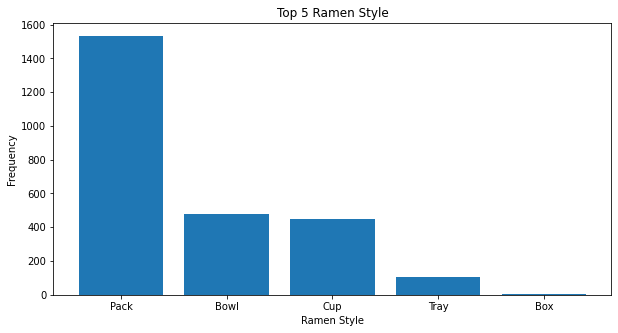

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(ramenStyle["RamenStyleName"], ramenStyle["Ramen Style"])
plt.title("Top 5 Ramen Style")
plt.xlabel("Ramen Style")
plt.ylabel("Frequency")
plt.show()

In [ ]:
loyalty = session.sql("""
  SELECT
  td.Quantity,
  CASE
  WHEN COUNT(td.Quantity) > 125 THEN `Ramen Master`
  WHEN COUNT(td.Quantity) > 75 AND COUNT(td.Quantity) < 125 THEN `Ramen Lover`
  WHEN COUNT(td.Quantity) > 0 AND COUNT(td.Quantity) < 76 THEN `Ramen Newbie`
  END AS `Rank`
  FROM TransactionHeader th JOIN TransactionDetail td ON th.TransactionId = td.TransactionId
  GROUP BY td.Quantity
""")

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 0))



AnalysisException: ignored